# Create handler for LVC NR files -- SXS0057_Res5

In [2]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
# %matplotlib auto
%matplotlib inline
# Import useful things
#
# from os import system
# system('source ~/.virtual_enviroments/ringdownFD_nikhef/bin/activate')
from nrutils.core.basics import lalphenom
from nrutils import scsearch,gwylm,lvcnr5_to_gwylm
# Setup plotting backend
# import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
# mpl.rcParams['lines.linewidth'] = 0.8
# mpl.rcParams['font.size'] = 18
# mpl.rcParams['axes.labelsize'] = 20
# mpl.rcParams['axes.titlesize'] = 20
# from matplotlib import rc
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)



from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
#
import corner
#
from numpy import *
from numpy.linalg import pinv
#
from nrutils.core.units import *
from positive.maths import lim
#
from scipy.optimize import minimize
from os.path import expanduser
#
import lal
from lal import MSUN_SI, PC_SI, C_SI, G_SI, MTSUN_SI
import lalsimulation as lalsim
alert('The LASIMULATION version is located at: %s'%( bold(yellow(lalsim.__path__[0])) ))
#
import review_ringdownFD_nikhef as review
from nrutils.analyze.match import match as match_object
from scipy.interpolate import InterpolatedUnivariateSpline as spline
#
import h5py
#
from glob import glob as find

(positive)>> Applying custom matplotlib settings.
(notebook)>> The LASIMULATION version is located at: /Users/book/.virtual_enviroments/ringdownFD_nikhef/opt/lalsuite/lib/python2.7/site-packages/lalsimulation


In [3]:
# Define path to h5 file
# h5dir = '/Users/book/MOUNT/lvcnr/SXS/SXS_BBH_0001_Res5.h5'
h5dir = '/Users/book/GARREG/nrlvc_files/SXS/SXS_BBH_0001_Res5.h5'
# h5dir = '/Users/book/MOUNT/lvcnr/SXS/SXS_BBH_0063_Res5.h5'

# SXSID -- File Name 
# 63 -- d13.0_q8.0_s0_s0
# 151 -- d15_q1_sA_0_0_-0.6_sB_0_0_-0.6
# 65 -- d13.0_q8.0_s0_0_0.5_s0
# 01 -- d18.0_q1.0_s0_0_0_s0_0_0
# 64 -- d13.0_q8.0_s0_0_-0.5_s0
# 156 -- d15_q1_sA_0_0_-0.95_sB_0_0_-0.95
# 167 -- d13_q4_sA_0_0_0_sB_0_0_0
# 152 -- d15_q1_sA_0_0_0.6_sB_0_0_0.6
# 172 -- d15.4_q1.00_sA_0.000_0.000_0.980_sB_-0.000_-0.000_0.980

# sxsid = [ 63,151,65,1,64,156,167,152,172 ]
# sxs_catalog_dir = '/Users/book/MOUNT/lvcnr/SXS/'
# sxs_h5_path = []
# for k in sxsid:
#     fl = find( sxs_catalog_dir+'*%03i_Res*'%k )
#     hr_id = argmax([ int(f.split('_Res')[-1].split('.')[0]) for f in fl ])
#     sxs_h5_path.append( fl[hr_id] )
# print sxs_h5_path

# 
f = h5py.File( h5dir )

print f.attrs.keys()
print f.keys()
# print f['remnant-mass-vs-time'].keys()

# plot(f['remnant-mass-vs-time']['X'],f['remnant-mass-vs-time']['Y'])
# plot(f['LNhatz-vs-time']['X'],f['LNhatz-vs-time']['Y'],'.')
# xlim([-10,10])

aa = f['position1y-vs-time']
print aa



[u'NR-group', u'name', u'alternative-names', u'simulation-type', u'object1', u'object2', u'PN_approximant', u'NR_reference_time', u'mass1', u'mass2', u'eta', u'NR_frame', u'f_lower_at_1MSUN', u'Omega', u'spin1x', u'spin1y', u'spin1z', u'spin2x', u'spin2y', u'spin2z', u'nhatx', u'nhaty', u'nhatz', u'LNhatx', u'LNhaty', u'LNhatz', u'eccentricity', u'mean_anomaly', u'type', u'Format', u'NR-code', u'modification-date', u'point-of-contact-email', u'INSPIRE-bibtex-keys', u'license', u'NR-techniques', u'Lmax', u'production-run', u'files-in-error-series', u'comparable-simulation']
[u'CommonHorizonTimes', u'HorizonATimes', u'HorizonBTimes', u'LNhatx-vs-time', u'LNhaty-vs-time', u'LNhatz-vs-time', u'NRtimes', u'Omega-vs-time', u'amp_l2_m-1', u'amp_l2_m-2', u'amp_l2_m0', u'amp_l2_m1', u'amp_l2_m2', u'amp_l3_m-1', u'amp_l3_m-2', u'amp_l3_m-3', u'amp_l3_m0', u'amp_l3_m1', u'amp_l3_m2', u'amp_l3_m3', u'amp_l4_m-1', u'amp_l4_m-2', u'amp_l4_m-3', u'amp_l4_m-4', u'amp_l4_m0', u'amp_l4_m1', u'amp_l4_m2'

In [4]:
# aa['Y'][0]
f.close()

In [60]:
y = lvcnr5_to_gwylm(h5dir,lmax=3,clean=False)

(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,-2)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,-1)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,0)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,1)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,2)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,-3)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,-2)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,-1)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,0)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,1)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,2)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,3)


([<matplotlib.axes._subplots.AxesSubplot at 0x112a16250>,
 <matplotlib.figure.Figure at 0x10edd59d0>)

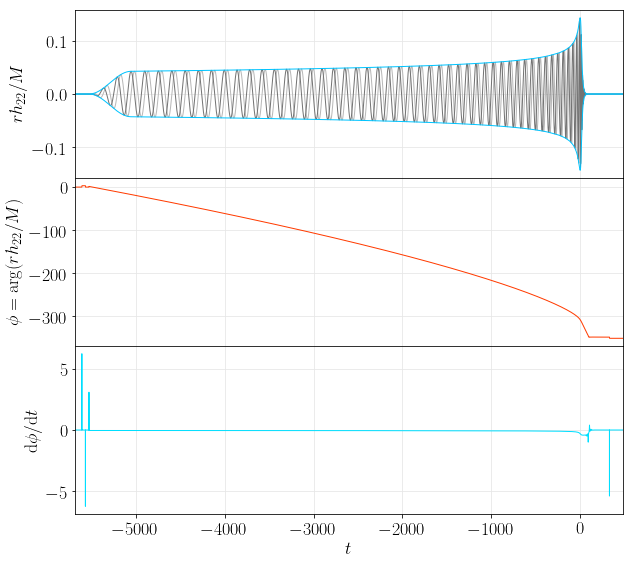

In [61]:
y.lm[2,2]['strain'].plot()

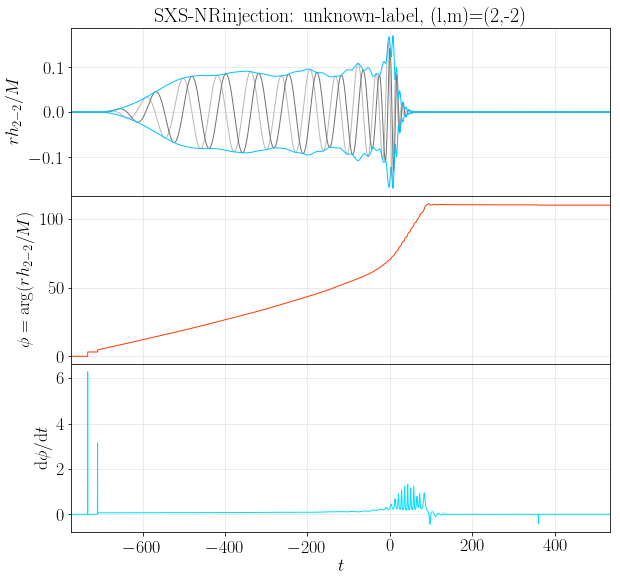

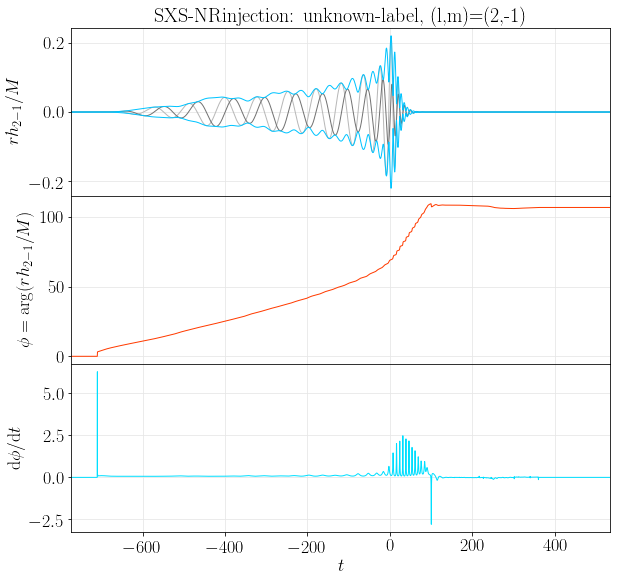

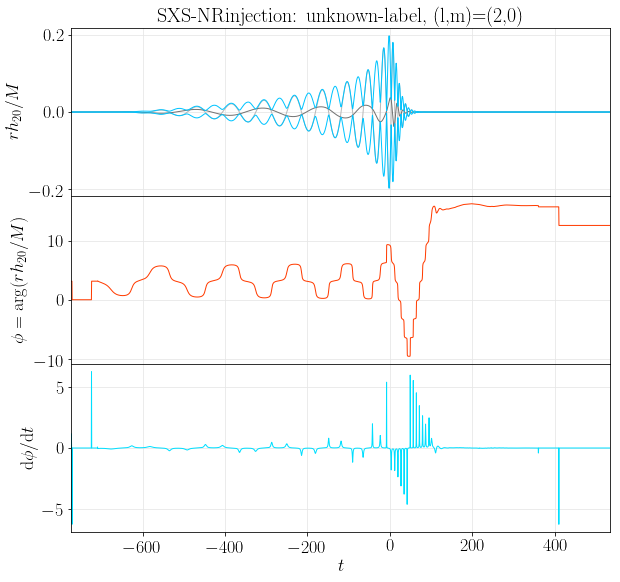

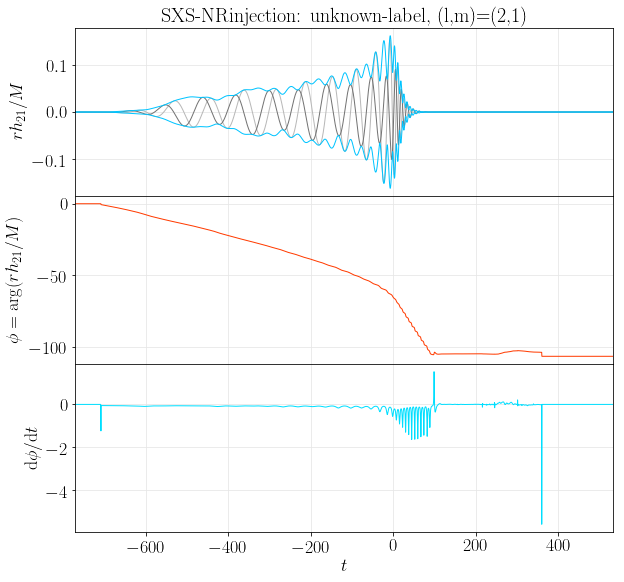

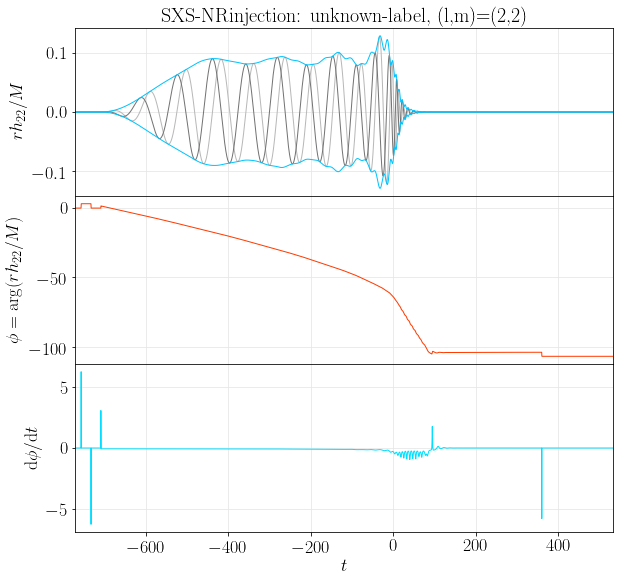

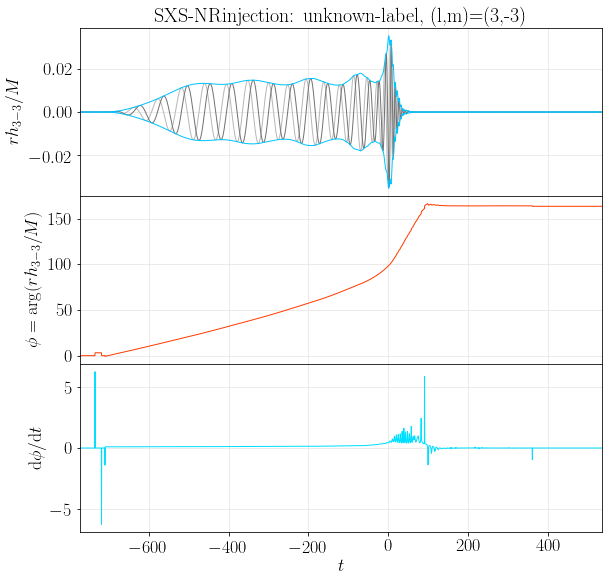

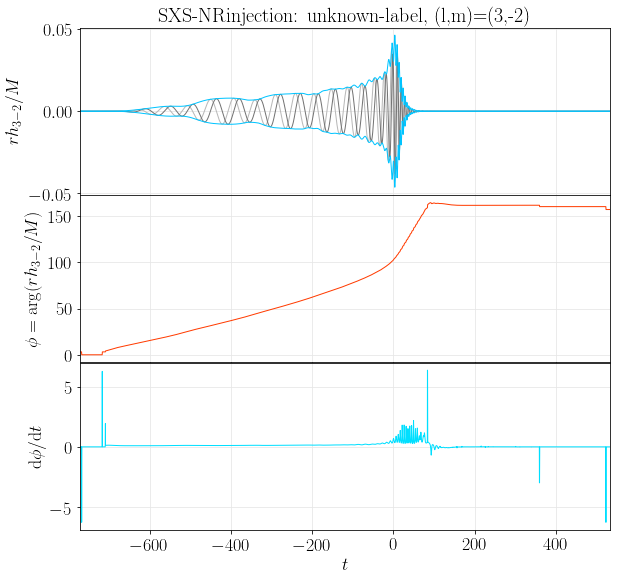

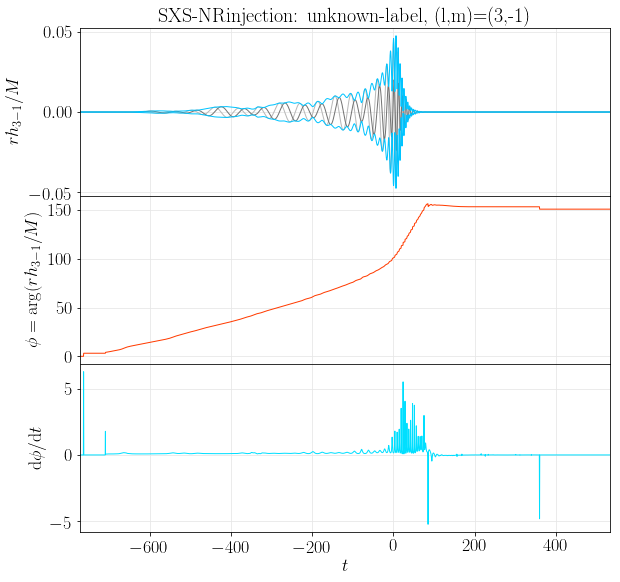

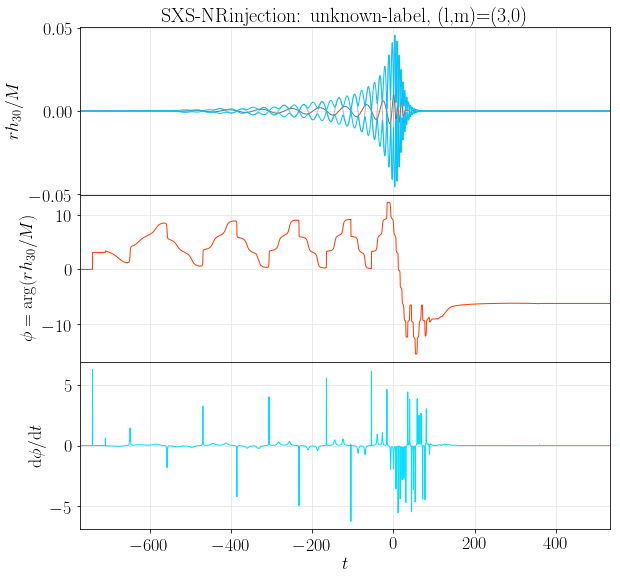

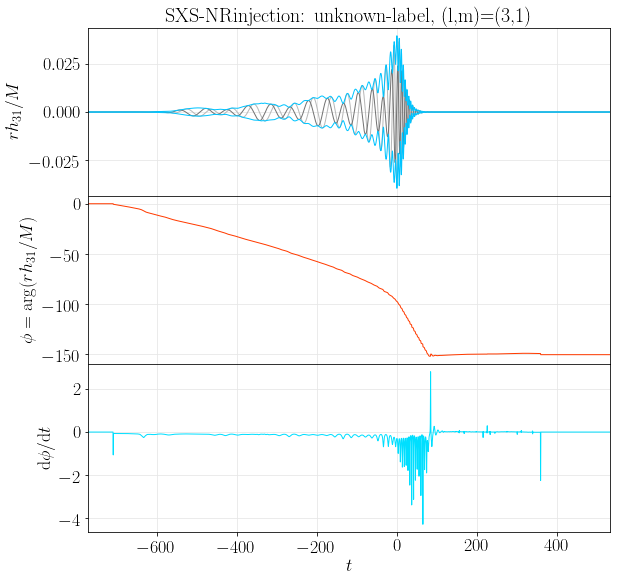

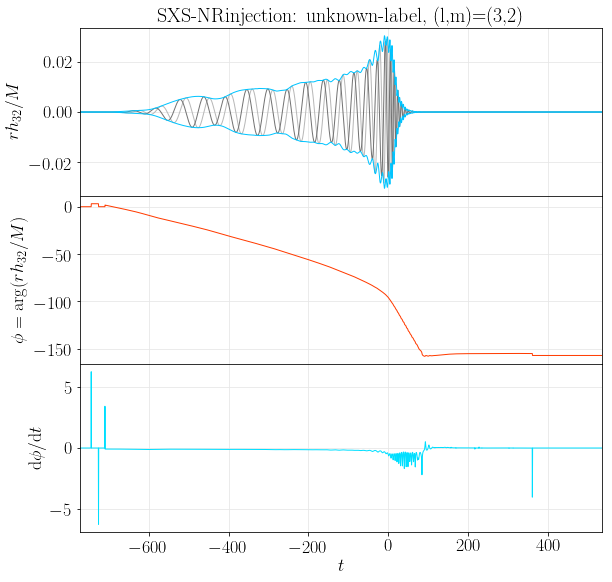

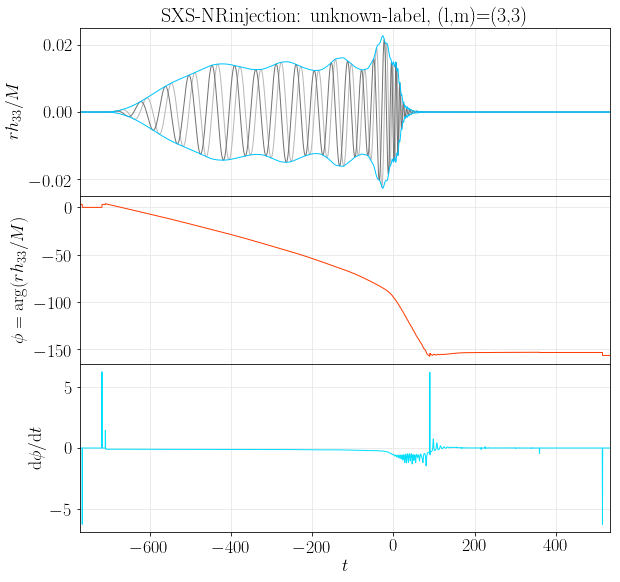

In [57]:
y.plot(kind='strain')

(gwylm.recompose!)>> no domain specified for recompose calculation. We will proceed assuming that you desire recomposed time domain data. Please specify the desired domain (e.g. time or freq) you wish to be output as a keyword (e.g. kind="freq")


([<matplotlib.axes._subplots.AxesSubplot at 0x110ecd150>,
 <matplotlib.figure.Figure at 0x111f1d710>)

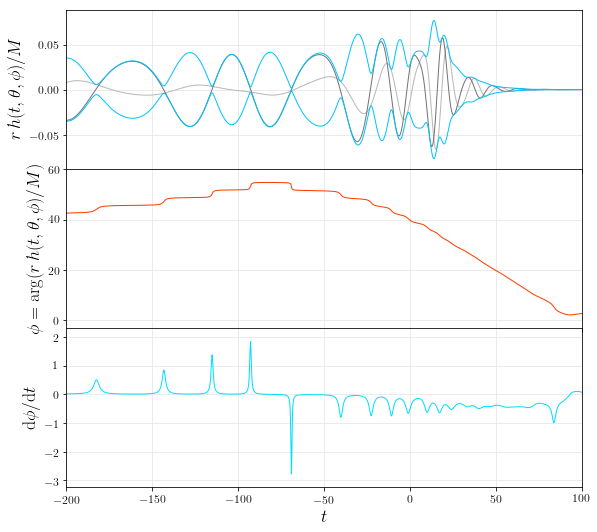

In [10]:
a = y.recompose(pi/2,0,kind='strain')
a.plot(tlim=[-200,100])

In [ ]:

# 
M_Sol = 100
D_Mpc = 150
inclination = 1.83
fmin = 100
phi_ref = 0 # pi/3
#
M = M_Sol*MSUN_SI
Mf = Mf_Sol*MSUN_SI
D = D_Mpc*1.0e6*PC_SI
#
t_code = y.lm[2,2]['strain'].t
deltaT = physt( diff(t_code)[0], M_Sol )
t = physt( t_code, M_Sol )
xf = y.xf
eta = y.eta
#
df = physf( y.lm[2,2]['strain'].df, M_Sol )
code_f = y.lm[2,2]['strain'].f
f  = physf( code_f, M_Sol )

#
fmin,fmax=30.0,1500.0
fmask = (f>=fmin) & (f<=fmax)

#
def signal_wfarr_fun( THETA,PHI,LM=None) : 
    ans = physhf( yrd.recompose( THETA,PHI,kind='strain',domain='freq').fd_wfarr[fmask,:], M_Sol, D_Mpc ) 
    return ans

#
def template_wfarr_fun( THETA,PHI,LM=None):
    # Import useful things 
    from numpy.fft import fft,fftshift
    # Evaluate LAL model in time domain
    hlal_raw = lalsim.SimRingdownMMRDNS_time(0.0,deltaT,len(t_code),Mf,xf,eta,THETA,PHI,D,nonGRparams=None)
    hp = hlal_raw[0].data.data
    hc = hlal_raw[1].data.data
    # Convert to frequency domain
    #hfp = fftshift( fft( hp ) )
    #hfc = fftshift( fft( hc ) )
    hfp = deltaT * fftshift( fft( hp ) )
    hfc = deltaT * fftshift( fft( hc ) )
    # Construct answer 
    f_ = physf( yrd.lm[2,2]['strain'].f, M_Sol )
    ans = array( [ f_, hfp, hfc ] ).T[fmask,:]
    # Return answer
    return ans